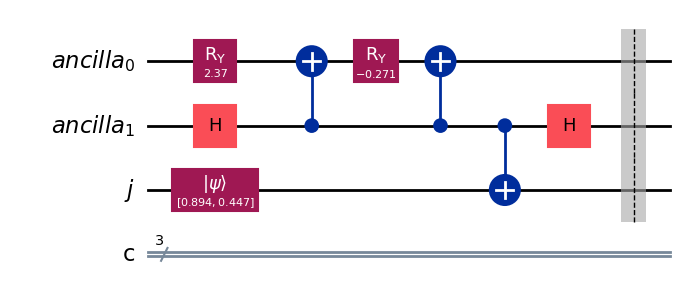

In [183]:

# We want to encode the nonunitary matrix A =[1/2, 1/4; 1/4, 1/2]
# if x=[1/2,1/4] then v=Ax=[1/4+1/16=5/16, 1/4] v_0^2=25/16^2 v_1^2=1/16 v_1^2/v_0^2=16/25=0.64

# Imports for Qiskit
from qiskit.compiler import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import RYGate
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
# various imports
import numpy as np
from matplotlib import pyplot as plt

from qiskit_aer import AerSimulator


# print(A*A)
# print(A[0,0])
alpha_1 = 1/2 # 0<alpha<1
alpha_2 = 1/4 # 0<alpha<1
phi_1 = np.arccos(alpha_1)+np.arccos(alpha_2)
phi_2 = np.arccos(alpha_1)-np.arccos(alpha_2)
A = np.matrix([[alpha_1, alpha_2], [alpha_2, alpha_1]])

# Create the various registers needed
input = QuantumRegister(1, name='j')
ancilla = QuantumRegister(2, name='ancilla')
measurement = ClassicalRegister(3, name='c')



# Create an empty circuit with the specified registers
circuit = QuantumCircuit(ancilla, input, measurement)


vector = [1/2,1/4] #this vector is already normalized
initial_state = vector/np.linalg.norm(vector)
circuit.initialize(initial_state, 2)  

circuit.h(1)

circuit.draw('mpl')
circuit.ry(phi_1, 0)
circuit.cx(1,0)
circuit.ry(phi_2, 0)
circuit.cx(1,0)
circuit.cx(1,2)
circuit.h(1)
circuit.barrier()
circuit.measure_all
#circuit.measure(0,0)
#circuit.measure(1, 1)
#circuit.measure(2, 2)

circuit.draw('mpl')





In [184]:
from qiskit.quantum_info import Statevector
# Set the initial state of the simulator to the ground state using from_int

state = Statevector.from_int(0, 2**3)
# Evolve the state by the quantum circuit
state = state.evolve(circuit)
#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [185]:
circuit.measure(0,0) #ancilla0
circuit.measure(1, 1) #ancilla1
circuit.measure(2, 2) #qubit
backend = AerSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(circuit, backend)
# Execute the circuit on the qasm simulator.
job_sim = backend.run(qc_compiled, shots=20000)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# only if ancilla0 and ancilla1 are 0 we get A*x
x_0 = counts['000']
x_1 = counts['100']

print(x_1/x_0)

0.6483023702754644
